# Olympic History Data Analysis 

### Lets explore which countries have the most medals and what events they dominate

#### Data pulled from https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results



#### Import needed modules and read in fies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df1 = pd.read_csv(r'C:\Users\...\datasets\athlete_events.csv')
df2 = pd.read_csv(r'C:\Users\...\datasets\noc_regions.csv')

In [3]:
df1.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [4]:
df2.head(2)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles


In [5]:
merged = df1.merge(df2, on='NOC', how='left')

#### Lets inspect/describe current dataframe

In [6]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [7]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
region    270746 non-null object
notes     5039 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [8]:
merged.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [9]:
merged.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

#### Quite a few missing values but since we are interested in the winners we are ok
#### Lets split data into summer and winter medal winners

In [10]:
summer = merged[(merged['Season']=='Summer')& ((merged['Medal']=='Gold') | (merged['Medal']=='Silver') | (merged['Medal']=='Bronze'))]

In [11]:
winter = merged[(merged['Season']=="Winter") & ((merged['Medal']=='Gold') | (merged['Medal']=='Silver') | (merged['Medal']=='Bronze'))]

In [12]:
summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN


In [13]:
winter.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
61,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze,Norway,NaN
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver,Norway,NaN
64,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze,Norway,NaN


#### Lets use summer and winter to create pivot table and add a total columns

In [14]:
summer_medals = summer.pivot_table(index='region',values='ID', columns='Medal',aggfunc='count')

In [15]:
winter_medals = winter.pivot_table(index='region',values='ID', columns='Medal',aggfunc='count')

In [16]:
summer_medals.head()

Medal,Bronze,Gold,Silver
region,,,
Afghanistan,2.0,NaN,NaN
Algeria,8.0,5.0,4.0
Argentina,91.0,91.0,92.0
Armenia,9.0,2.0,5.0
Australia,515.0,362.0,456.0


In [17]:
summer_medals['totals'] = summer_medals.sum(axis='columns')

In [18]:
winter_medals['totals'] = winter_medals.sum(axis='columns')

In [19]:
summer_medals.head(2)

Medal,Bronze,Gold,Silver,totals
region,,,,
Afghanistan,2.0,NaN,NaN,2.0
Algeria,8.0,5.0,4.0,17.0


In [20]:
winter_medals.head(2)

Medal,Bronze,Gold,Silver,totals
region,,,,
Australia,7.0,6.0,3.0,16.0
Austria,103.0,79.0,98.0,280.0


In [21]:
summer_medals = summer_medals.sort_values('totals', ascending=False)

In [22]:
winter_medals = winter_medals.sort_values('totals', ascending=False)

In [23]:
summer_medals.head()

Medal,Bronze,Gold,Silver,totals
region,,,,
USA,1197.0,2472.0,1333.0,5002.0
Russia,994.0,1220.0,974.0,3188.0
Germany,1064.0,1075.0,987.0,3126.0
UK,620.0,636.0,729.0,1985.0
France,587.0,465.0,575.0,1627.0


In [24]:
winter_medals.head()

Medal,Bronze,Gold,Silver,totals
region,,,,
Russia,184.0,379.0,196.0,759.0
USA,161.0,166.0,308.0,635.0
Germany,196.0,226.0,208.0,630.0
Canada,107.0,305.0,199.0,611.0
Norway,127.0,151.0,165.0,443.0


#### Now to visualize the top 10

In [25]:
top_summer = summer_medals[:10].reset_index()

In [26]:
top_winter = winter_medals[:10].reset_index()

In [27]:
top_summer.head()

Medal,region,Bronze,Gold,Silver,totals
0,USA,1197.0,2472.0,1333.0,5002.0
1,Russia,994.0,1220.0,974.0,3188.0
2,Germany,1064.0,1075.0,987.0,3126.0
3,UK,620.0,636.0,729.0,1985.0
4,France,587.0,465.0,575.0,1627.0


In [28]:
top_winter.head()

Medal,region,Bronze,Gold,Silver,totals
0,Russia,184.0,379.0,196.0,759.0
1,USA,161.0,166.0,308.0,635.0
2,Germany,196.0,226.0,208.0,630.0
3,Canada,107.0,305.0,199.0,611.0
4,Norway,127.0,151.0,165.0,443.0


Text(0.5,1,'Summer Bronze Totals')

<Figure size 2880x2880 with 0 Axes>

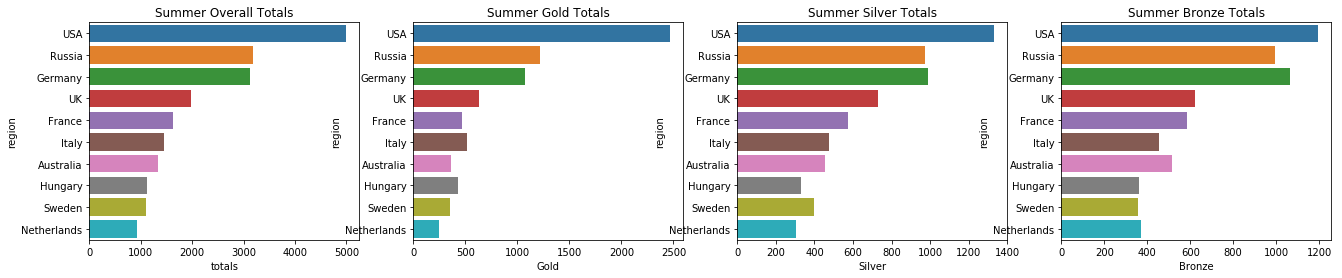

In [29]:
plt.figure(figsize=(40,40))
plt.tight_layout()
fig, axs = plt.subplots(ncols=4)
plt.subplots_adjust(right=3)
sns.barplot(x='totals', y='region', data=top_summer,ax=axs[0]).set_title('Summer Overall Totals')
sns.barplot(x='Gold', y='region', data=top_summer, ax=axs[1]).set_title('Summer Gold Totals')
sns.barplot(x='Silver', y='region', data=top_summer, ax=axs[2]).set_title('Summer Silver Totals')
sns.barplot(x='Bronze', y='region', data=top_summer, ax=axs[3]).set_title('Summer Bronze Totals')

Text(0.5,1,'Winter Bronze Totals')

<Figure size 2880x2880 with 0 Axes>

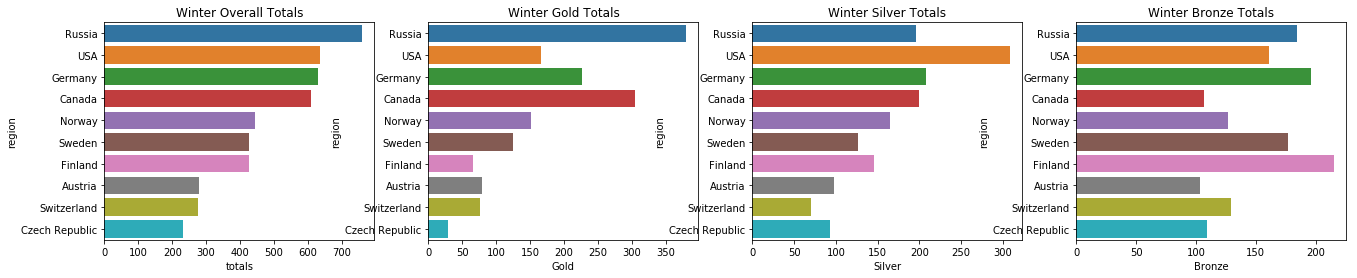

In [30]:
plt.figure(figsize=(40,40))
plt.tight_layout()
fig, axs = plt.subplots(ncols=4)
plt.subplots_adjust(right=3)
sns.barplot(x='totals', y='region', data=top_winter, ax=axs[0]).set_title('Winter Overall Totals')
sns.barplot(x='Gold', y='region', data=top_winter, ax=axs[1]).set_title('Winter Gold Totals')
sns.barplot(x='Silver', y='region', data=top_winter, ax=axs[2]).set_title('Winter Silver Totals')
sns.barplot(x='Bronze', y='region', data=top_winter, ax=axs[3]).set_title('Winter Bronze Totals')

#### Finally we'll breakdown the top 3 to see where they are most successful

In [31]:
USA_summer = summer[(summer['region']=='USA')]
Russia_summer = summer[(summer['region']=='Russia')]
Germany_summer = summer[(summer['region']=='Germany')]

In [32]:
USA_winter = winter[(winter['region']=='USA')]
Russia_winter = winter[(winter['region']=='Russia')]
Germany_winter = winter[(winter['region']=='Germany')]

<Figure size 432x288 with 0 Axes>

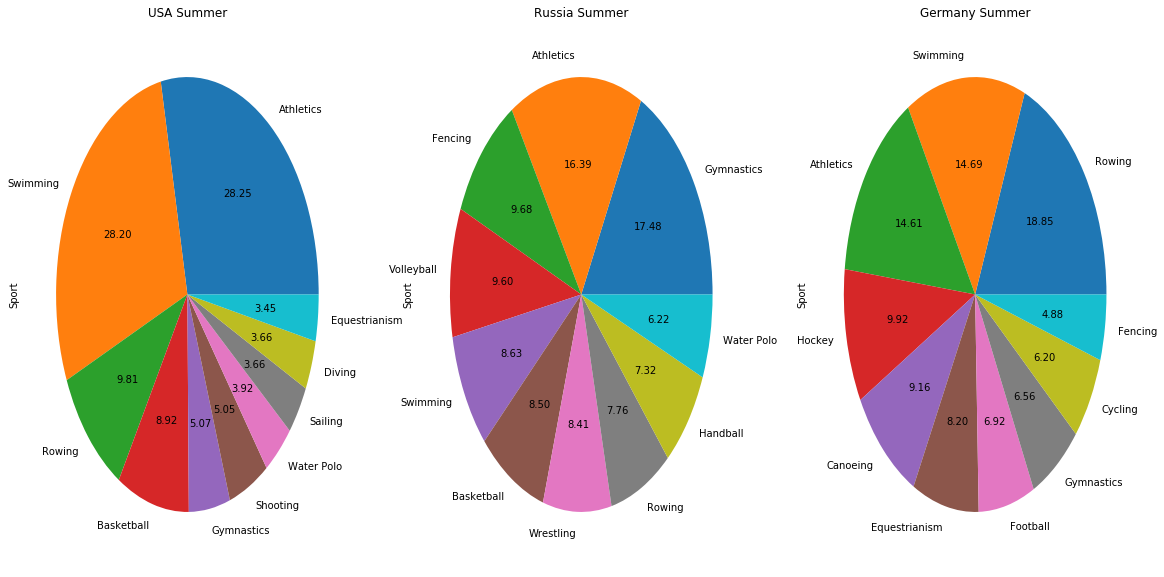

In [33]:
plt.tight_layout()
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
USA_summer['Sport'].value_counts().head(10).plot(kind='pie',autopct='%.2f',title='USA Summer')
plt.subplot(1, 3, 2)
Russia_summer['Sport'].value_counts().head(10).plot(kind='pie',autopct='%.2f',title='Russia Summer')
plt.subplot(1, 3, 3)
Germany_summer['Sport'].value_counts().head(10).plot(kind='pie',autopct='%.2f', title='Germany Summer')

<Figure size 432x288 with 0 Axes>

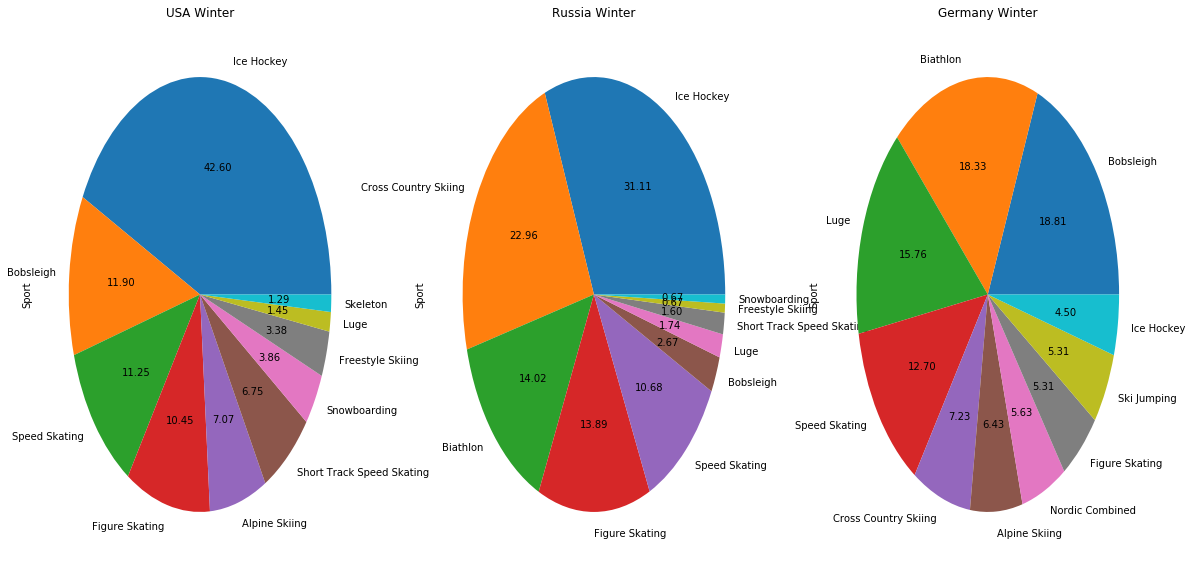

In [34]:
plt.tight_layout()
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
USA_winter['Sport'].value_counts().head(10).plot(kind='pie',autopct='%.2f',title='USA Winter')
plt.subplot(1, 3, 2)
Russia_winter['Sport'].value_counts().head(10).plot(kind='pie',autopct='%.2f',title='Russia Winter')
plt.subplot(1, 3, 3)
Germany_winter['Sport'].value_counts().head(10).plot(kind='pie',autopct='%.2f', title='Germany Winter')

(0, 1200)

<Figure size 432x288 with 0 Axes>

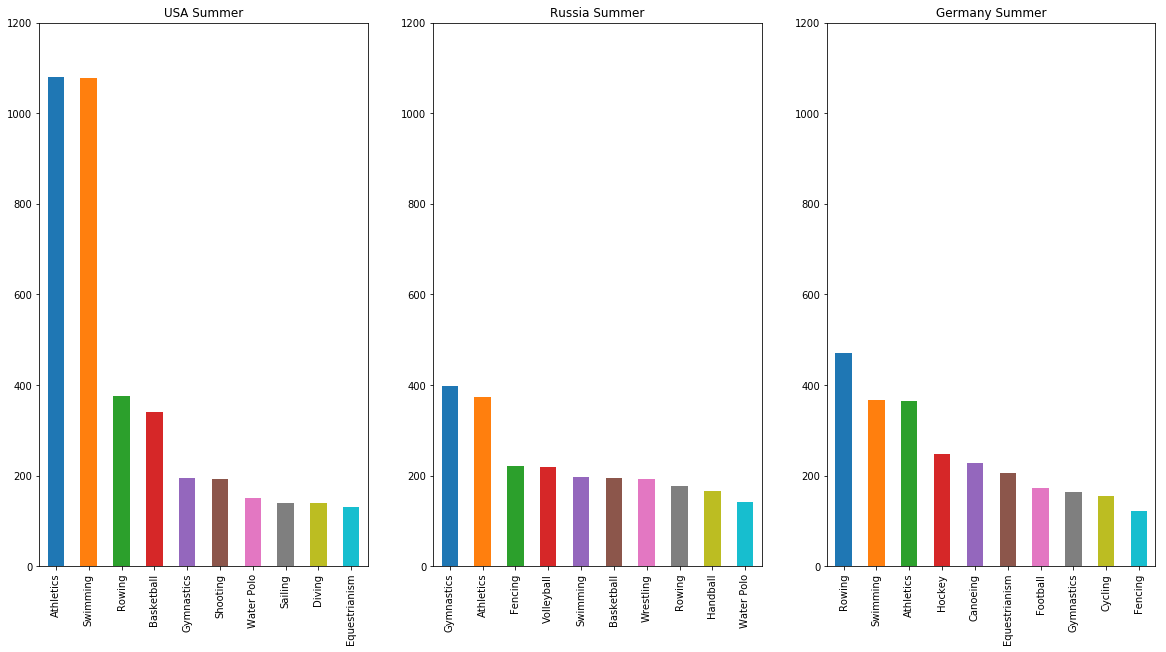

In [35]:
plt.tight_layout()
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
USA_summer['Sport'].value_counts().head(10).plot(kind='bar',title='USA Summer').set_ylim(0,1200)
plt.subplot(1, 3, 2)
Russia_summer['Sport'].value_counts().head(10).plot(kind='bar',title='Russia Summer').set_ylim(0,1200)
plt.subplot(1, 3, 3)
Germany_summer['Sport'].value_counts().head(10).plot(kind='bar', title='Germany Summer').set_ylim(0,1200)


<Figure size 432x288 with 0 Axes>

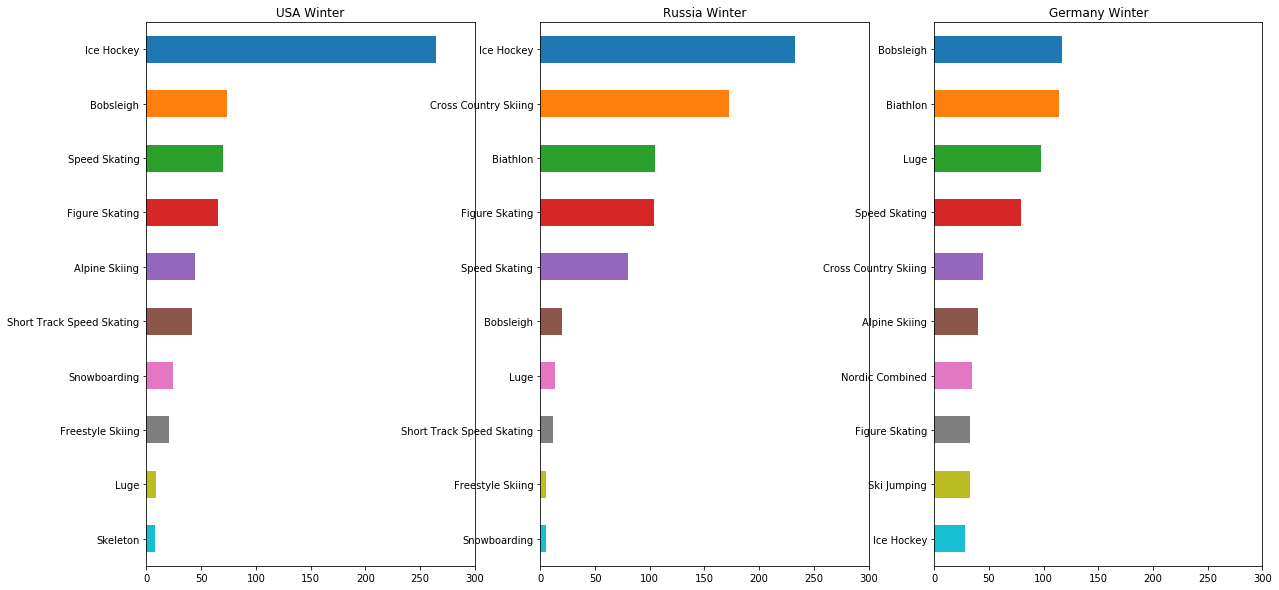

In [36]:
plt.tight_layout()
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
USA_winter['Sport'].value_counts().head(10).plot(kind='barh',title='USA Winter').set_xlim(0,300)
plt.gca().invert_yaxis()
plt.subplot(1, 3, 2)
Russia_winter['Sport'].value_counts().head(10).plot(kind='barh',title='Russia Winter').set_xlim(0,300)
plt.gca().invert_yaxis()
plt.subplot(1, 3, 3)
Germany_winter['Sport'].value_counts().head(10).plot(kind='barh', title='Germany Winter').set_xlim(0,300)
plt.gca().invert_yaxis()
